Ranked list of stations:

- Filter: neighborhoods with most traffic (from Andrew's code)
- Then rank by tech neighborhoods, then highest income

Time to spend at each station:

- Analyze hours for the stations chosen

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_pickle('data_clean.pkl')
df.drop('Mean Entries & Exits',axis=1,inplace=True)
df.rename(columns={'Cum. Entries & Exits': 'traffic'}, inplace=True)
df.head()

,TURNSTILE,STATION,year,month,day,hour,WD vs WE,traffic
2,R001|00-00-00,WHITEHALL S-FRY,2016,2,27,8,WE,28.0
3,R001|00-00-00,WHITEHALL S-FRY,2016,2,27,12,WE,202.0
4,R001|00-00-00,WHITEHALL S-FRY,2016,2,27,16,WE,297.0
5,R001|00-00-00,WHITEHALL S-FRY,2016,2,27,20,WE,306.0
8,R001|00-00-00,WHITEHALL S-FRY,2016,2,28,8,WE,24.0


# 30 most traveled stations, by day 

In [2]:
weekdays = df[df['WD vs WE'] == 'WD']
weekdays_agg = weekdays.groupby(['STATION','year','month','day']).agg({'traffic':'sum'}).reset_index()
stations_av = weekdays_agg.groupby(['STATION']).agg({'traffic':'mean'}).reset_index()
stations_av.sort_values('traffic',ascending=False,inplace=True)

In [3]:
stations_av['is_top30'] = False
stations_av.iloc[0:30, 2] = True
stations_av.head()

,STATION,traffic,is_top30
233,GRD CNTRL-42 ST,673086.096154,True
59,34 ST-HERALD SQ,603255.263462,True
84,57 ST-7 AV,516912.361538,True
61,34 ST-PENN STA,376927.634615,True
9,125 ST,370732.907692,True


381 total stations.

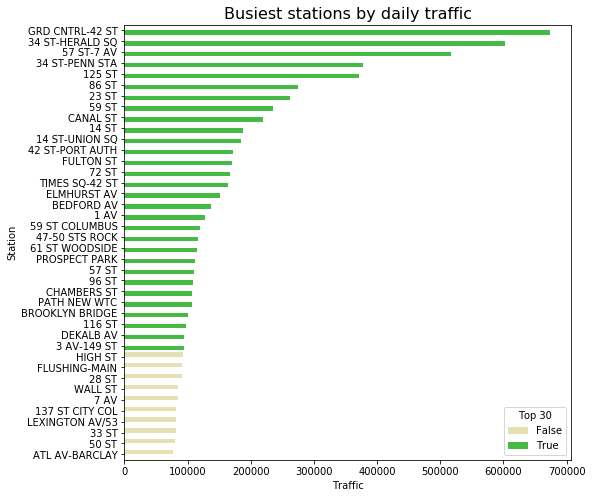

In [4]:
plt.figure(figsize=(8,8))
sns.barplot(y='STATION', x='traffic', hue='is_top30', data=stations_av[:40],palette=['palegoldenrod','limegreen']);
plt.title('Busiest stations by daily traffic',fontsize=16, )
plt.xlabel('Traffic')
plt.ylabel('Station')
plt.legend(title='Top 30');

# Map 

In [5]:
stations_geo = pd.read_csv("Data/stations.csv")

In [6]:
stations_geo.head()

,STATION,lat,long
0,1 AV,40.731759,-73.982277
1,116 ST,40.808350,-73.963590
2,125 ST,40.804622,-73.937429
3,14 ST,40.738228,-73.996209
4,14 ST-UNION SQ,40.735000,-73.991000


In [7]:
weekdays = pd.merge(weekdays,stations_geo,how='left',on='STATION')

In [8]:
weekdays.columns

Index(['TURNSTILE', 'STATION', 'year', 'month', 'day', 'hour', 'WD vs WE',
       'traffic', 'lat', 'long'],
      dtype='object')

In [13]:
import geopandas

In [57]:
stations_geo

,station,lat,long
0,1 AV,40.731759,-73.982277
1,116 ST,40.808350,-73.963590
2,125 ST,40.804622,-73.937429
3,14 ST,40.738228,-73.996209
4,14 ST-UNION SQ,40.735000,-73.991000
5,18 ST,40.741040,-73.997871
6,23 ST,40.744000,-73.996000
7,28 ST,40.747000,-73.993000
8,3 AV-149 ST,40.816329,-73.917956
9,34 ST-HERALD SQ,40.749142,-73.988810


# Income data

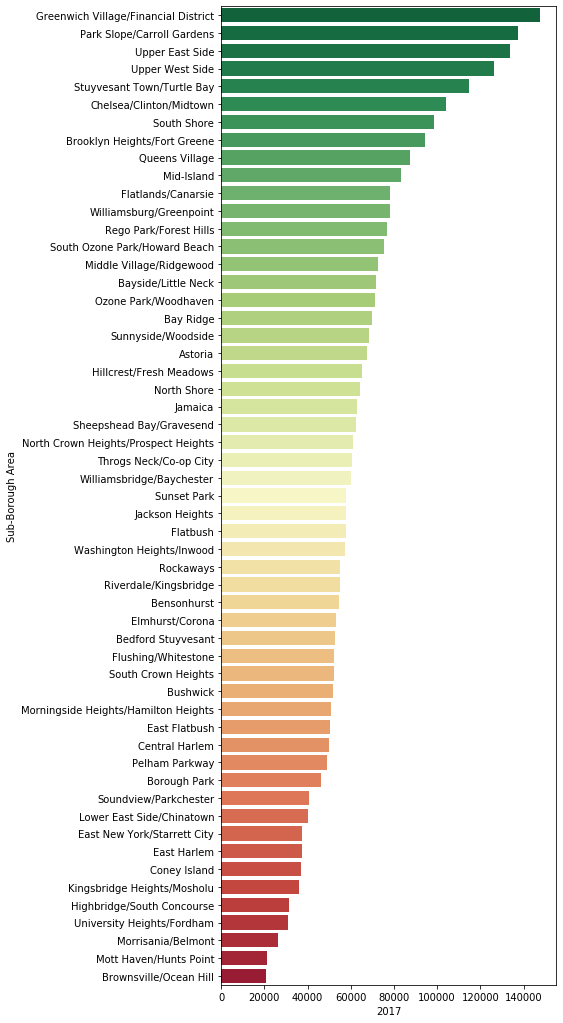

In [12]:
zipcode_df = pd.read_csv('Data/sub-borougharea-medianhouseholdincome2018.csv')
zipcode_df.groupby('Sub-Borough Area',as_index=False)['2017','2016'].mean().shape

plt.figure(figsize=(6,18))
sns.barplot(y='Sub-Borough Area', x='2017', 
            data=zipcode_df.sort_values('2017',ascending=False),
            palette = sns.color_palette("RdYlGn_r", len(zipcode_df)));